In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from pprint import pprint

##Load Data

In [2]:
MlbH=pd.read_csv("C:/Users/kulka/AnacondaJunior/HW1_Review/house_prices.csv")
MlbH.fillna(MlbH.mean(), inplace=True)
MlbH.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
y=MlbH.loc[:,['Price']]
ys=MlbH.loc[:,['Price']]
X=MlbH.loc[:,['BuildingArea','YearBuilt','Propertycount','Postcode','Car','Rooms','Bathroom','Landsize','Lattitude','Longtitude','Distance']]
Xs=MlbH.loc[:,['BuildingArea','YearBuilt','Propertycount','Postcode','Car','Rooms','Bathroom','Landsize','Lattitude','Longtitude','Distance']]
X.head()

,BuildingArea,YearBuilt,Propertycount,Postcode,Car,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Distance
0,151.96765,1964.684217,4019.0,3067.0,1.0,2,1.0,202.0,-37.7996,144.9984,2.5
1,79.00000,1900.000000,4019.0,3067.0,0.0,2,1.0,156.0,-37.8079,144.9934,2.5
2,150.00000,1900.000000,4019.0,3067.0,0.0,3,2.0,134.0,-37.8093,144.9944,2.5
3,151.96765,1964.684217,4019.0,3067.0,1.0,3,2.0,94.0,-37.7969,144.9969,2.5
4,142.00000,2014.000000,4019.0,3067.0,2.0,4,1.0,120.0,-37.8072,144.9941,2.5


In [4]:
X.describe()

,BuildingArea,YearBuilt,Propertycount,Postcode,Car,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Distance
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,151.967650,1964.684217,7454.417378,3105.301915,1.610075,2.937997,1.534242,558.416127,-37.809203,144.995216,10.137776
std,392.002962,28.972246,4378.581772,90.676964,0.960433,0.955748,0.691712,3990.669241,0.079260,0.103916,5.868725
min,0.000000,1196.000000,249.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,-38.182550,144.431810,0.000000
25%,122.000000,1960.000000,4380.000000,3044.000000,1.000000,2.000000,1.000000,177.000000,-37.856822,144.929600,6.100000
50%,151.967650,1964.684217,6555.000000,3084.000000,2.000000,3.000000,1.000000,440.000000,-37.802355,145.000100,9.200000
75%,151.967650,1975.000000,10331.000000,3148.000000,2.000000,3.000000,2.000000,651.000000,-37.756400,145.058305,13.000000
max,44515.000000,2018.000000,21650.000000,3977.000000,10.000000,10.000000,8.000000,433014.000000,-37.408530,145.526350,48.100000


In [22]:
y.describe()

,Price
count,1.358000e+04
mean,1.075684e+06
std,6.393107e+05
min,8.500000e+04
25%,6.500000e+05
50%,9.030000e+05
75%,1.330000e+06
max,9.000000e+06


## Make A Decision Tree

In [6]:
## Split up data set so we can train with partial set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1)

In [7]:
##Create Tree

MlbHDtree = DecisionTreeRegressor(max_leaf_nodes=400,random_state=1)
MlbHDtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=400, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [8]:
y_test_pred = MlbHDtree.predict(X_test)
mae = mean_absolute_error(y_test,y_test_pred)
print(mae)

203794.91033243932


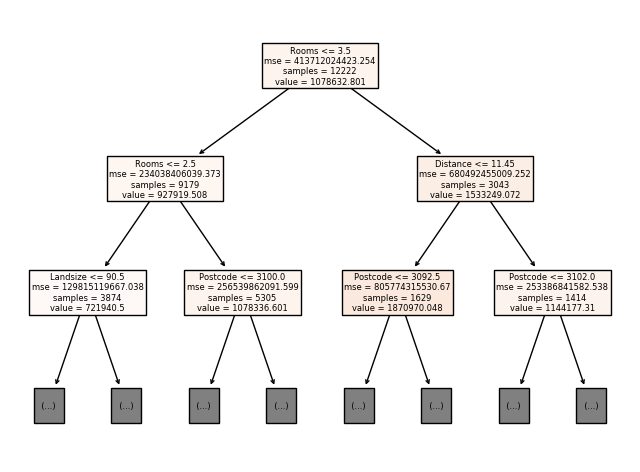

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi=100)
plot_tree(MlbHDtree, max_depth=2, feature_names=X.columns, fontsize=6, filled=True)
plt.show()

In [10]:
def get_mae_dtr(mx_lf_nds,X_trn, y_trn, X_tst,y_tst):
  mdlDtrMlb = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds,random_state=1)
  mdlDtrMlb.fit(X_trn, y_trn)
  y_test_pred = mdlDtrMlb.predict(X_tst)

  mae = mean_absolute_error(y_tst, y_test_pred)
  return(mae)

In [11]:
get_mae_dtr(50,X_train, y_train,X_test,y_test)

238081.74271635315

In [12]:
for i in [400,425,450,475]:
    mae = get_mae_dtr(i,X_train, y_train, X_test, y_test)
    print('Max leaf nodes:',i,'\t\t Mean Absolute Error: ', mae)

Max leaf nodes: 400 		 Mean Absolute Error:  203794.91033243932
Max leaf nodes: 425 		 Mean Absolute Error:  203890.56837878653
Max leaf nodes: 450 		 Mean Absolute Error:  204282.50714342325
Max leaf nodes: 475 		 Mean Absolute Error:  205723.70096548027


In [13]:
def Test_Size_Opti(Xs,ys,test_size=i,random_state=1):
  Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,ys,test_size=i, random_state=1)
  NMlbHDtree = DecisionTreeRegressor(max_leaf_nodes=500,random_state=1)
  NMlbHDtree.fit(Xs_train, ys_train)
  y_test_pred =  NMlbHDtree.predict(Xs_test)
    
  mae = mean_absolute_error(ys_test, y_test_pred)
  return(mae)

In [14]:
Test_Size_Opti(Xs,ys,test_size=.2,random_state=1)

199137.88714522682

In [15]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    mae = Test_Size_Opti(Xs,ys,test_size=i,random_state=1)  
    print('Test_Size:',i,'\t\t Mean Absolute Error: ', mae)

Test_Size: 0.1 		 Mean Absolute Error:  206860.63130505
Test_Size: 0.2 		 Mean Absolute Error:  218994.5131476281
Test_Size: 0.3 		 Mean Absolute Error:  215658.4584533661
Test_Size: 0.4 		 Mean Absolute Error:  226566.9615425205
Test_Size: 0.5 		 Mean Absolute Error:  228475.7891807389
Test_Size: 0.6 		 Mean Absolute Error:  237932.7648785435
Test_Size: 0.7 		 Mean Absolute Error:  250826.87529983316
Test_Size: 0.8 		 Mean Absolute Error:  256396.19542246452
Test_Size: 0.9 		 Mean Absolute Error:  299626.62920075067


In [16]:
#CreateRandomForest/Define
MlbHRFtree = RandomForestRegressor(max_leaf_nodes=400,random_state=1,n_estimators=40, max_features=0.5)

In [17]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(MlbHRFtree.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 0.5,
 'max_leaf_nodes': 400,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [18]:
param_grid = {
    'max_leaf_nodes' : [4,40,400],
    'n_estimators': [10,20,40],
    'max_features': ['auto','sqrt', 0.25, 0.5, 0.75, 1.0],
}

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   11.7s finished
C:\Users\kulka\OneDrive\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_features': 0.5, 'max_leaf_nodes': 400, 'n_estimators': 40}


In [19]:
#fit
MlbHRFtree.fit(X_train, y_train)

#Predict
y_pred_test = MlbHRFtree.predict(X_test)

#Evaluate

mae= mean_absolute_error(y_test,y_test_pred)

C:\Users\kulka\OneDrive\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [21]:
print('MAE (Random Forest):', mae)
PercentError=((mae/1.075684e+06)*100)
print('The percent error is:', PercentError)    

MAE (Random Forest): 203794.91033243932
The percent error is: 18.94561138145025


## Decreased error from 24% to 18%